In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [3]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [4]:
#convert date data type
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [6]:
#convert Date_month_year data type with differnt method
df.astype({'Date_month_year':'datetime64'}).dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df_number_of_complaint = df.groupby('Date_month_year').count()
df_number_of_complaint1 = pd.DataFrame(df_number_of_complaint['Customer Complaint'])
df_number_of_complaint1.head()

,Customer Complaint
Date_month_year,
04-Apr-15,12
04-Aug-15,28
04-Dec-15,15
04-Feb-15,27
04-Jan-15,18


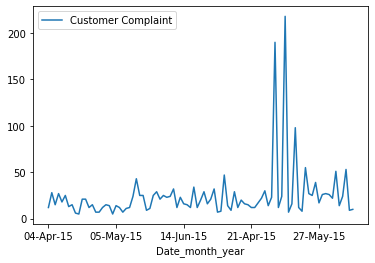

In [10]:

df_number_of_complaint1.plot()

In [11]:
#Provide a table with the frequency of complaint types.
df.groupby(pd.Grouper(key='Date', freq = 'M')).count()

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date,,,,,,,,,,
2015-04-30,545,545,545,545,545,545,545,545,545,545
2015-05-31,399,399,399,399,399,399,399,399,399,399
2015-06-30,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280


In [12]:
df['index'] = df['Date']

In [13]:
df = df.set_index('index')

In [56]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
index,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-04-08,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2015-04-18,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
2015-05-26,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [14]:
df.groupby(pd.Grouper(freq = 'M')).size()


index
2015-04-30     545
2015-05-31     399
2015-06-30    1280
Freq: M, dtype: int64

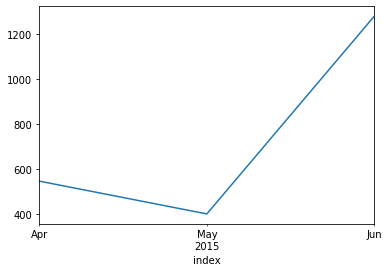

In [15]:
df.groupby(pd.Grouper(freq = 'M')).size().plot()


In [16]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
index,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-04-08,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [17]:
#complaint types are maximum i.e., around internet, network issues, or across any other domains.
df['New_status'] = ['Open' if status == 'Open'  or status == 'Pending' else 'Closed' for status in df['Status']]

In [18]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_status
index,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
2015-04-08,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2015-04-18,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed


In [19]:
df.reset_index()

,index,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_status
0,2015-04-22,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,2015-04-08,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,2015-04-18,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,2015-05-26,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2015-04-02,213550,Service Availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Closed
2220,2015-06-02,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed
2221,2015-06-09,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Closed
2222,2015-06-23,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed


In [20]:
df.groupby('State').size()

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [93]:
stacked_chart = df.groupby(['State','New_status']).size().unstack().fillna(0)

stacked_chart

New_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


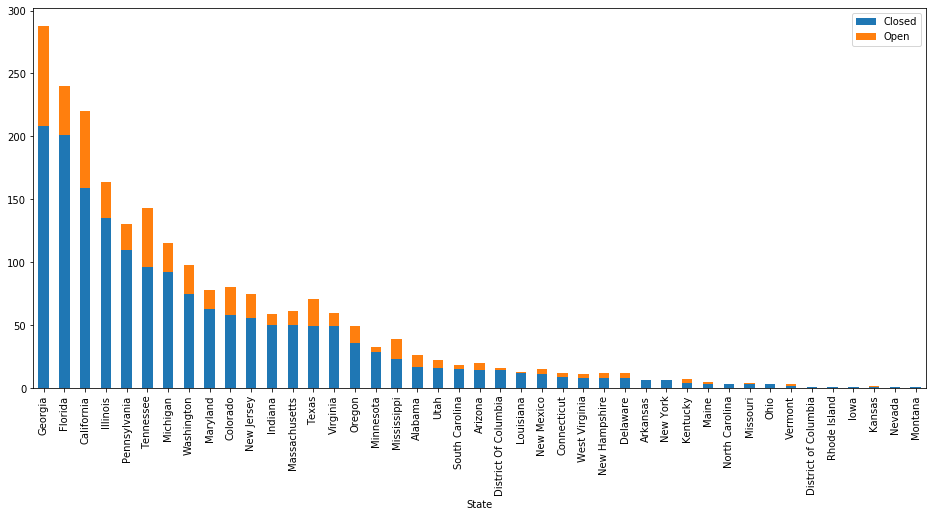

In [128]:
stacked_chart.sort_values('Closed', ascending = False).plot(kind = 'bar', figsize = (16,7),stacked = True)

In [95]:
df.groupby("State").size().sort_values(ascending = False).reset_index().rename({0:'Number of complaint'}, axis =1)[:1]

,State,Number of complaint
0,Georgia,288


In [96]:
stacked_chart.head()

New_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


In [132]:
stacked_chart['Unresolved_percentage'] = (stacked_chart.Open/stacked_chart.Open.sum())*100
stacked_chart['Resolved_percentage'] = (stacked_chart.Closed/stacked_chart.Closed.sum())*100
stacked_chart.head(5)

,Closed,Open,Unresolved_percentage,Resolved_percentage
State,,,,
Alabama,17.0,9.0,1.740812,0.995899
Arizona,14.0,6.0,1.160542,0.820152
Arkansas,6.0,0.0,0.000000,0.351494
California,159.0,61.0,11.798839,9.314587
Colorado,58.0,22.0,4.255319,3.397774


In [141]:
stacked_chart[['Unresolved_percentage']].sort_values('Unresolved_percentage', ascending=False, axis=0)[:1]

,Unresolved_percentage
State,
Georgia,15.473888


In [143]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_status
index,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
2015-04-08,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed


In [152]:
df.reset_index()
resolved_df  = df.groupby(['Received Via', 'New_status']).size().unstack().fillna(0)
resolved_df

New_status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [159]:
resolved_df['Resolved_ticket'] = (resolved_df.Closed/resolved_df.Closed.sum())*100
resolved_df

New_status,Closed,Open,Resolved_ticket
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886
